# <center> Экзамен по "Науке о данных" </center>

Задание выполнил: Хайкин Глеб Алексеевич, БЭК1812

Время выполнения заданий - 3 часа (11:00 - 14:00). 

Экзамен включает 3 обязательных задания для получения максимальной оценки (100 баллов) и 30 бонусных баллов.

До 14:00 необходимо сдать задание на Github Classroom в формате .ipynb, указав имя, фамилию и группу в названии файла, и загрузить свой код по каждой задаче на Яндекс.Контест https://contest.yandex.ru/contest/18973/enter для проверки на плагитат. 

Уточнения условия, если они будут, появятся по ссылке https://www.overleaf.com/read/kbwtcskdtbbv, в телеграм канале @room112, и в чате «Науки о данных».


In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sts
from scipy.optimize import minimize
from math import sqrt, floor, ceil

from bs4 import BeautifulSoup
import requests 

from tqdm import tqdm 
import time
from typing import List, Tuple, Dict
from itertools import takewhile, dropwhile

import plotly
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.io as pio
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

### Задача про блуждание (35 баллов)

Шерлок Холмс расследует дело о пропаже бюллетеней на избирательном участке. Ватсон заметил, что всегда во время своих размышлений Холмс ходит ровно по прямой. Предположим, что в начале движения Шерлок находится в точке с координатой $0$. В каждый момент времени его координата изменяется на $\Delta x$ метров, где $\Delta x$ — случайная величина, имеющая стандартное нормальное распределение. Эта величина прибавляется к текущей координате после каждого шага и может принимать положительные и отрицательные значения.

1. Постройте график изменения положения Шерлока (его координаты на прямой) за $1000$ шагов. По горизонтали – количество пройденных шагов, по вертикали – положение Шерлока.[**5 баллов**]

2. Постройте для траектории положения Шерлока из предыдущего пункта график изменения выборочного среднего и дисперсии для $\Delta x$. По горизонтали – количество шагов, по вертикали – значения выборочного среднего и выборочной дисперсии. [**10 баллов**]

3. Проведите $10^3$ экспериментов по 500 шагов. Продемонстрируйте на одном графике $15$ случайных траекторий из проведенных экспериментов. [**10 баллов**]

4. Добавьте на график из предыдущего пункта усредненную по всем экспериментам траекторию выборочной дисперсии для каждого шага. [**10 баллов**]

1.

In [45]:
np.random.seed(52)
delta = np.random.normal(size=1000)
polozh = np.concatenate((np.array([0]), np.cumsum(delta)))

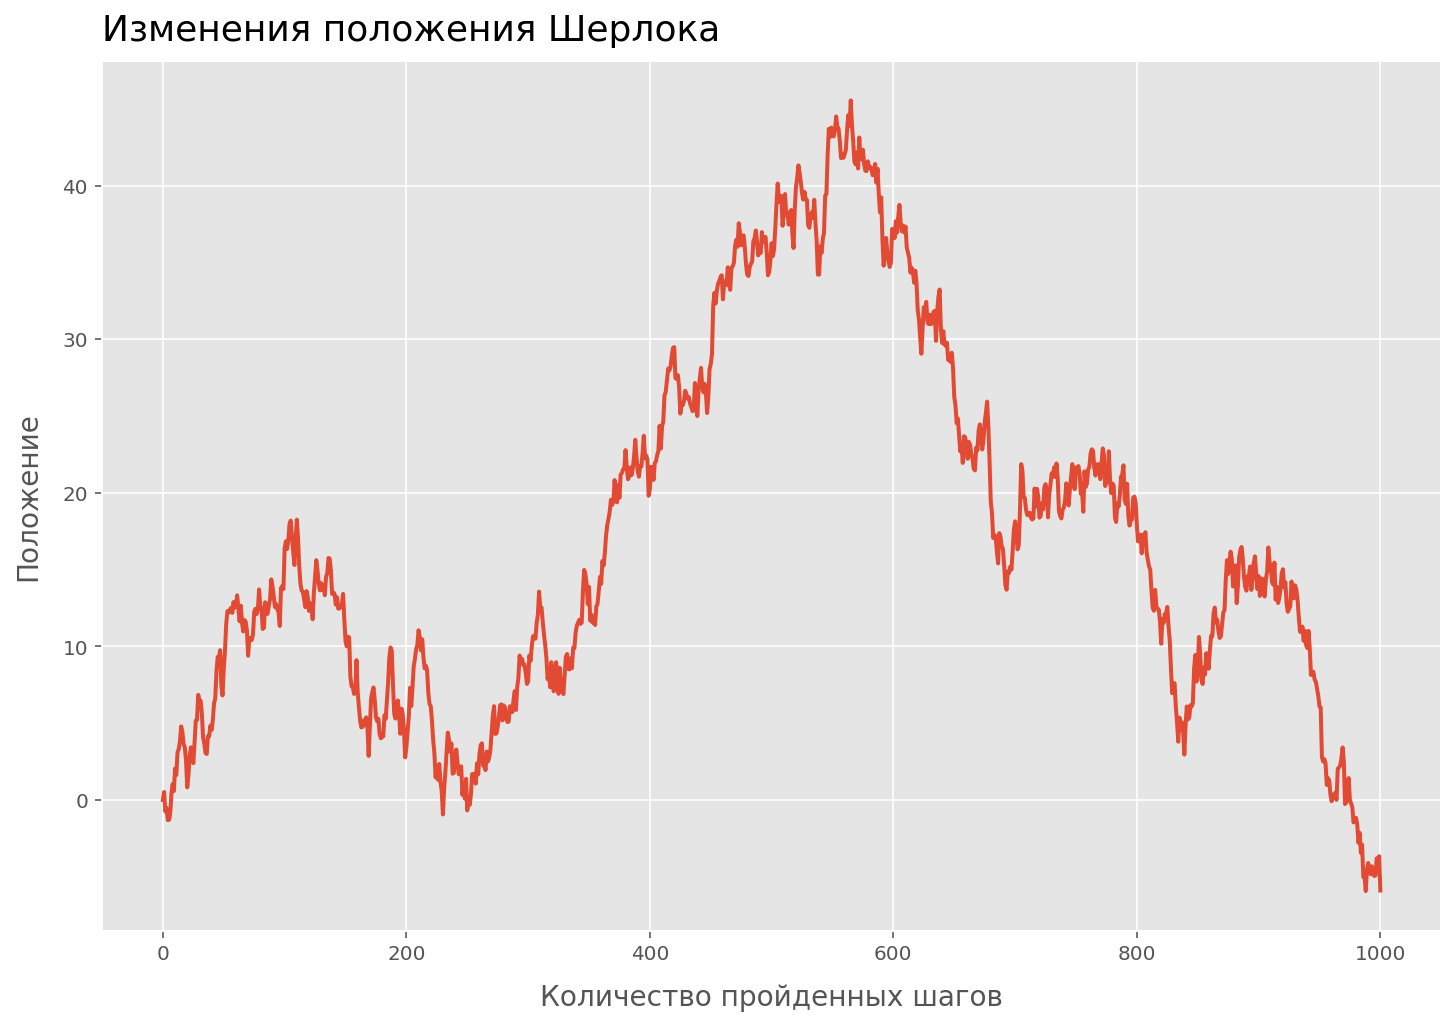

In [46]:
plt.title('Изменения положения Шерлока', pad=10, fontsize=18, loc='left')
plt.xlabel('Количество пройденных шагов', labelpad=10, fontsize=14)
plt.ylabel('Положение', labelpad=10, fontsize=14)
plt.plot(np.arange(1001), polozh, lw=2);

2.

In [47]:
mu_hats = []
var_hats = []

# считаем от двух наблюдений, так как иначе нам не посчитать несмещенную выборочную дисперсию
for n in range(2, 1001):
    mu = np.mean(delta[:n])
    var = np.var(delta[:n], ddof=1)
    mu_hats.append(mu)
    var_hats.append(var)

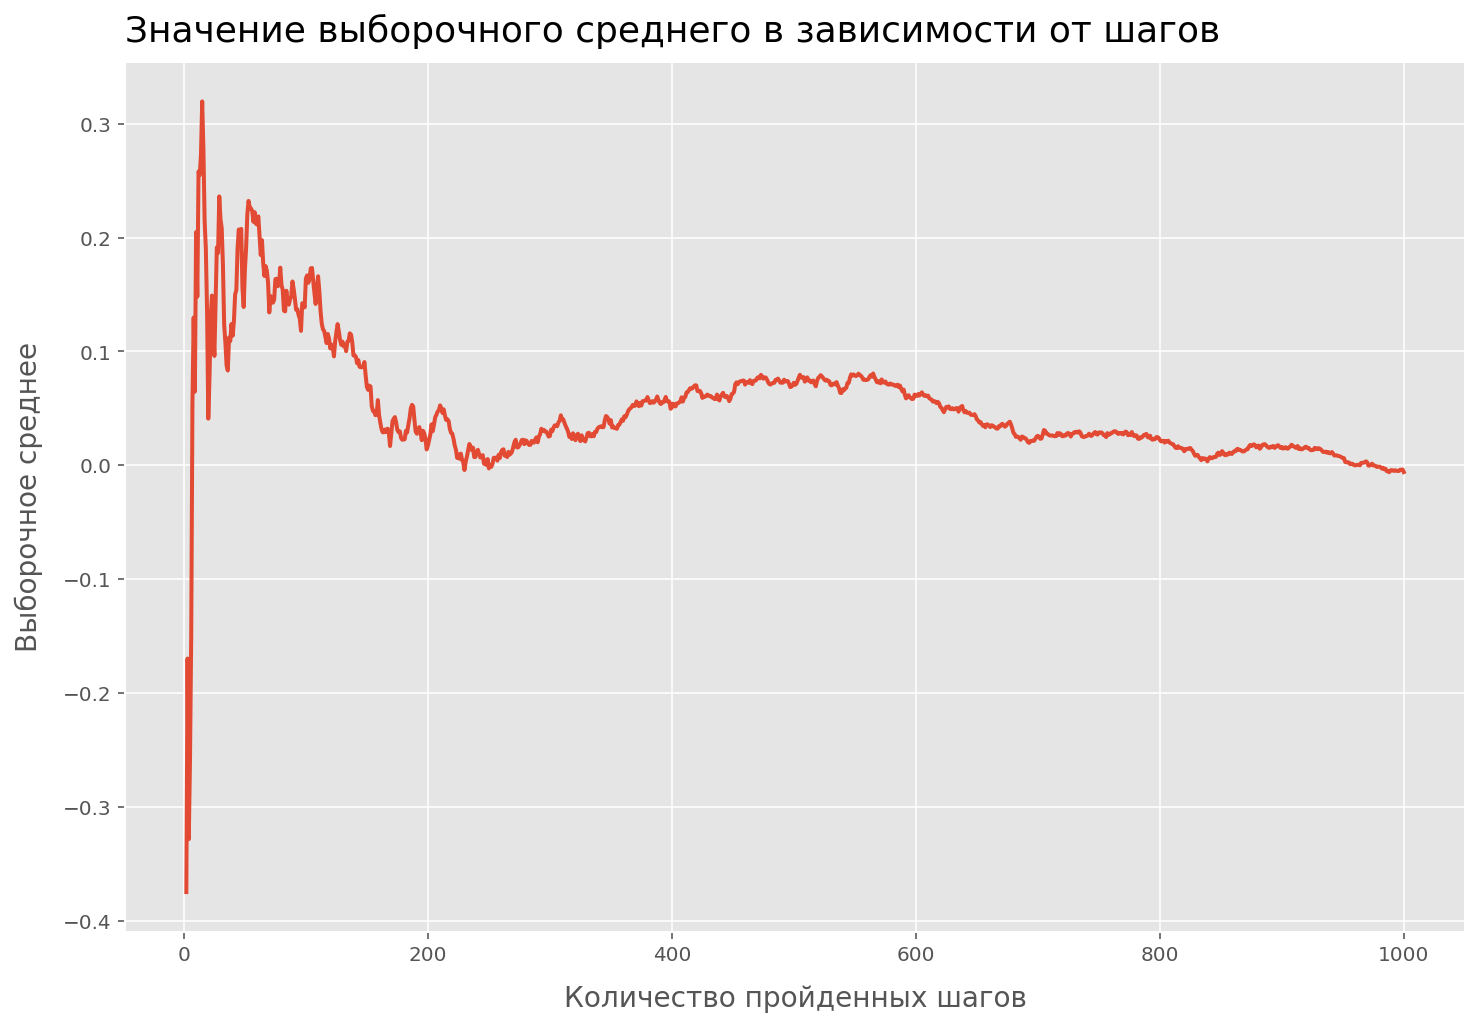

In [48]:
plt.title('Значение выборочного среднего в зависимости от шагов', pad=10, fontsize=18, loc='left')
plt.xlabel('Количество пройденных шагов', labelpad=10, fontsize=14)
plt.ylabel('Выборочное среднее', labelpad=10, fontsize=14)
plt.plot(np.arange(2, 1001), mu_hats, lw=2);

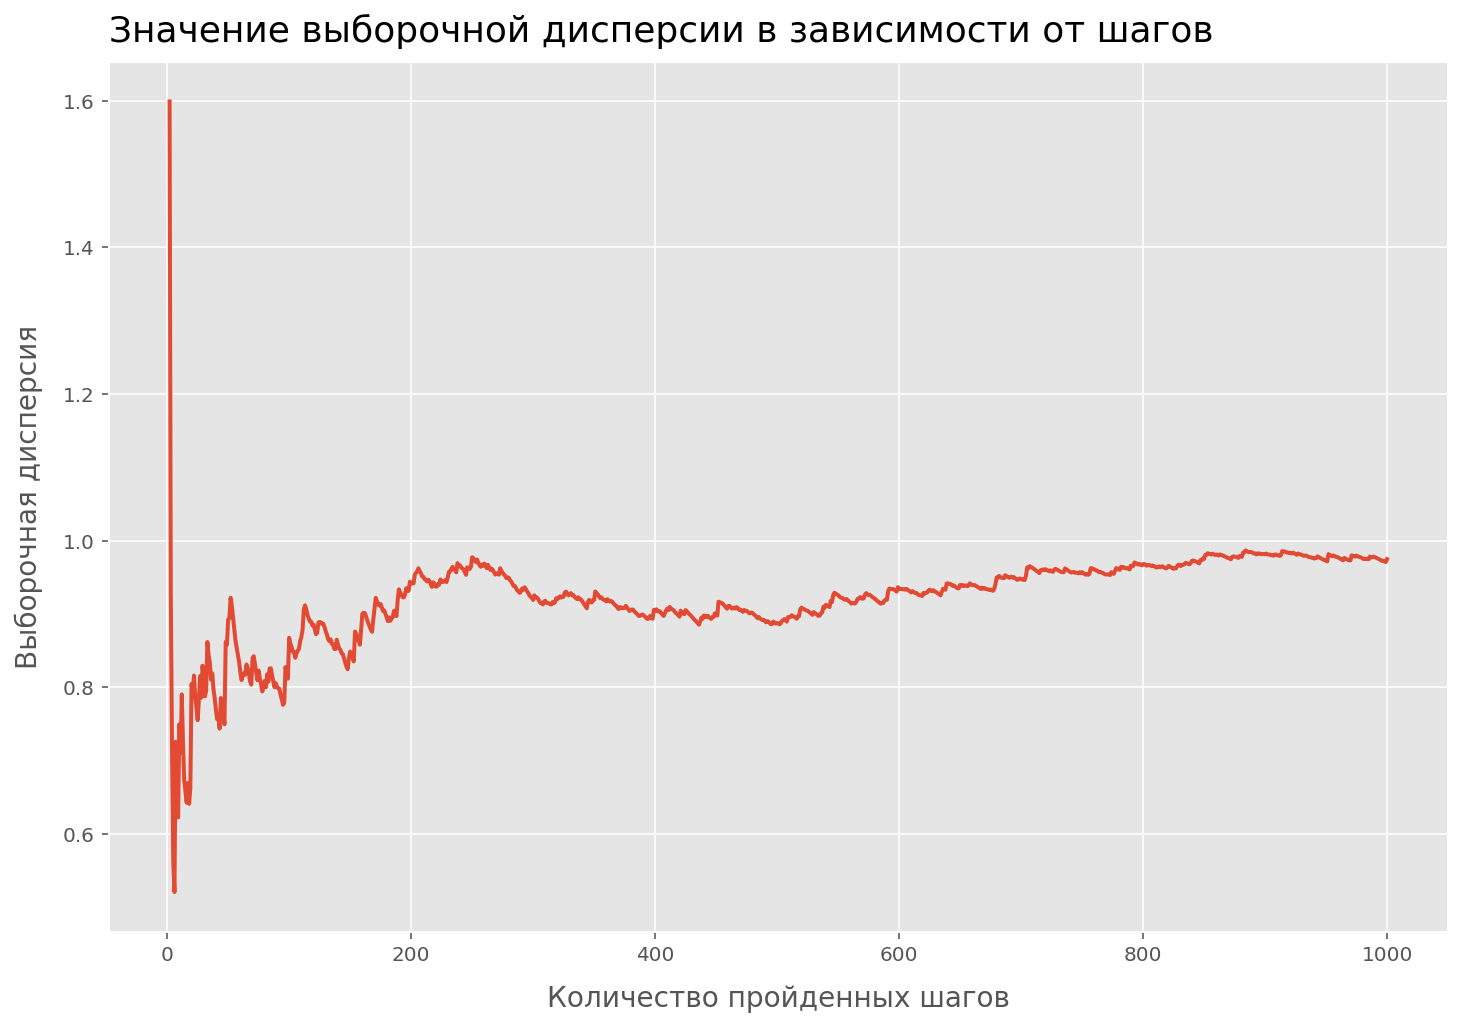

In [49]:
plt.title('Значение выборочной дисперсии в зависимости от шагов', pad=10, fontsize=18, loc='left')
plt.xlabel('Количество пройденных шагов', labelpad=10, fontsize=14)
plt.ylabel('Выборочная дисперсия', labelpad=10, fontsize=14)
plt.plot(np.arange(2, 1001), var_hats, lw=2);

3. 

In [66]:
trajectories = []
mus_hats = []
vars_hats = []

n = 10**3 # количество эксипрементов
np.random.seed(52)

for _ in tqdm(range(n)):
    delta = np.random.normal(size=500)
    polozh = np.concatenate((np.array([0]), np.cumsum(delta)))
    
    trajectories.append(polozh)
    
    mu_hats = []
    var_hats = []

    # считаем от двух наблюдений, так как иначе нам не посчитать несмещенную выборочную дисперсию
    for n in range(2, 501):
        mu = np.mean(delta[:n])
        var = np.var(delta[:n], ddof=1)
        mu_hats.append(mu)
        var_hats.append(var)
    
    mus_hats.append(np.array(mu_hats))
    vars_hats.append(np.array(var_hats))

100%|██████████| 1000/1000 [00:14<00:00, 67.90it/s]


In [67]:
np.random.seed(52)
# выбираем 15 случайных траекторий
rand_nums = np.random.choice(n, 15, replace=False)

In [68]:
rand_nums 

array([175, 137, 496, 231,  27, 257, 242, 299, 410, 392, 114, 199, 454,
        52,  19])

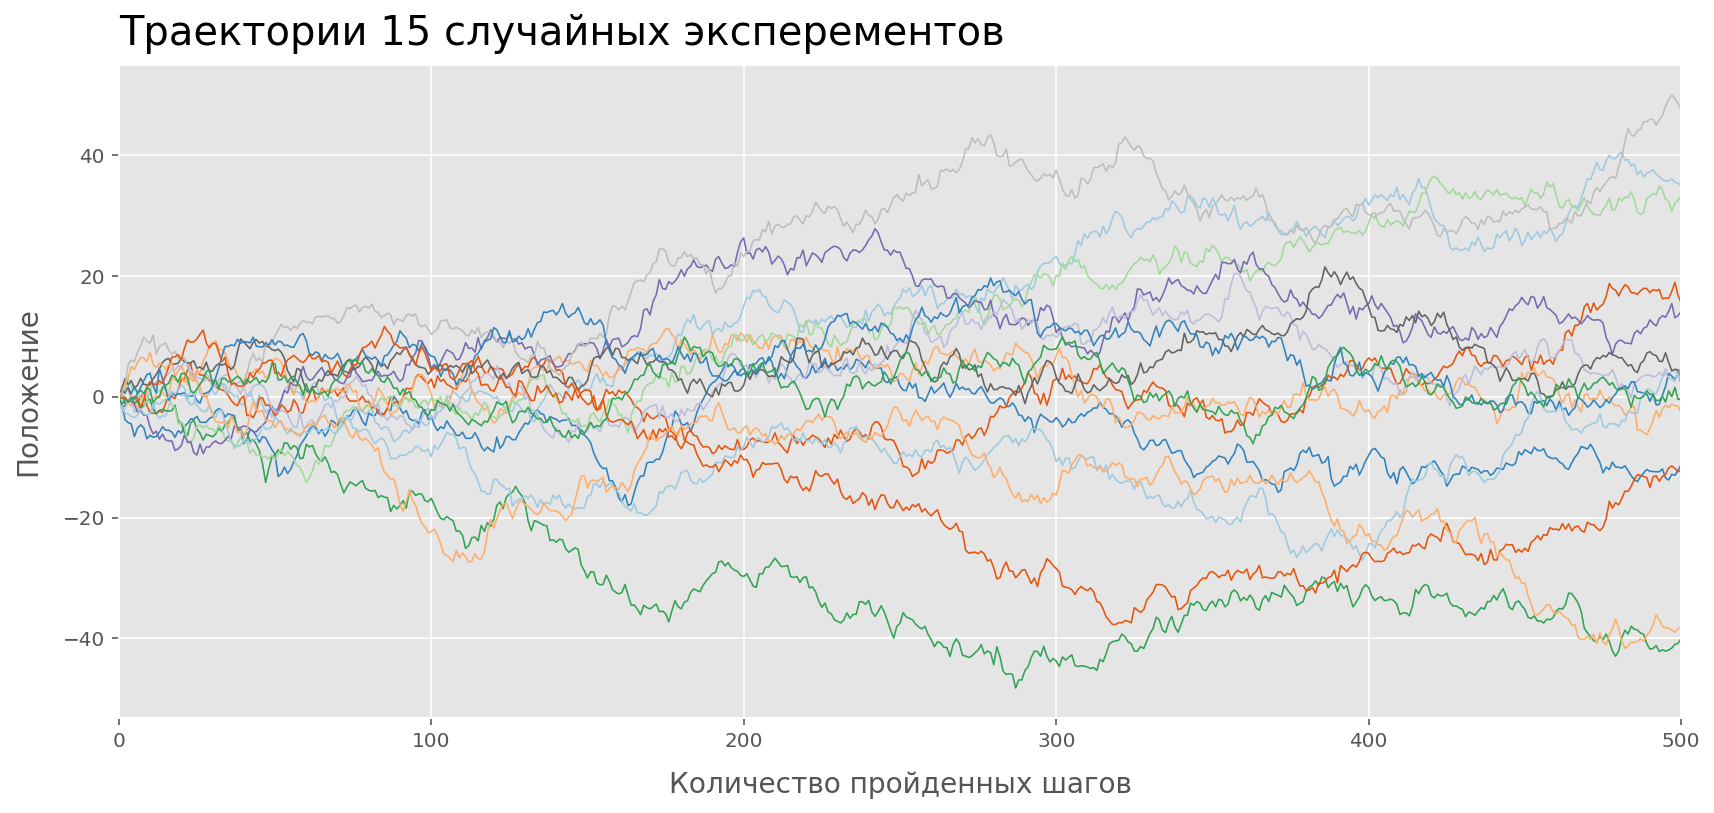

In [69]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
cm = plt.get_cmap('tab20c')
ax.set_prop_cycle('color', [cm(1.*i/10) for i in range(10)])

ax.set_title('Траектории 15 случайных эксперементов', pad=10, fontsize=20, loc='left')
ax.set_xlabel('Количество пройденных шагов', labelpad=10, fontsize=14)
ax.set_ylabel('Положение', labelpad=10, fontsize=14)
ax.set_xlim(0, 500)

# Рисуем 15 случайных траекторий 
for num in rand_nums:
    ax.plot(trajectories[num], lw=0.8);

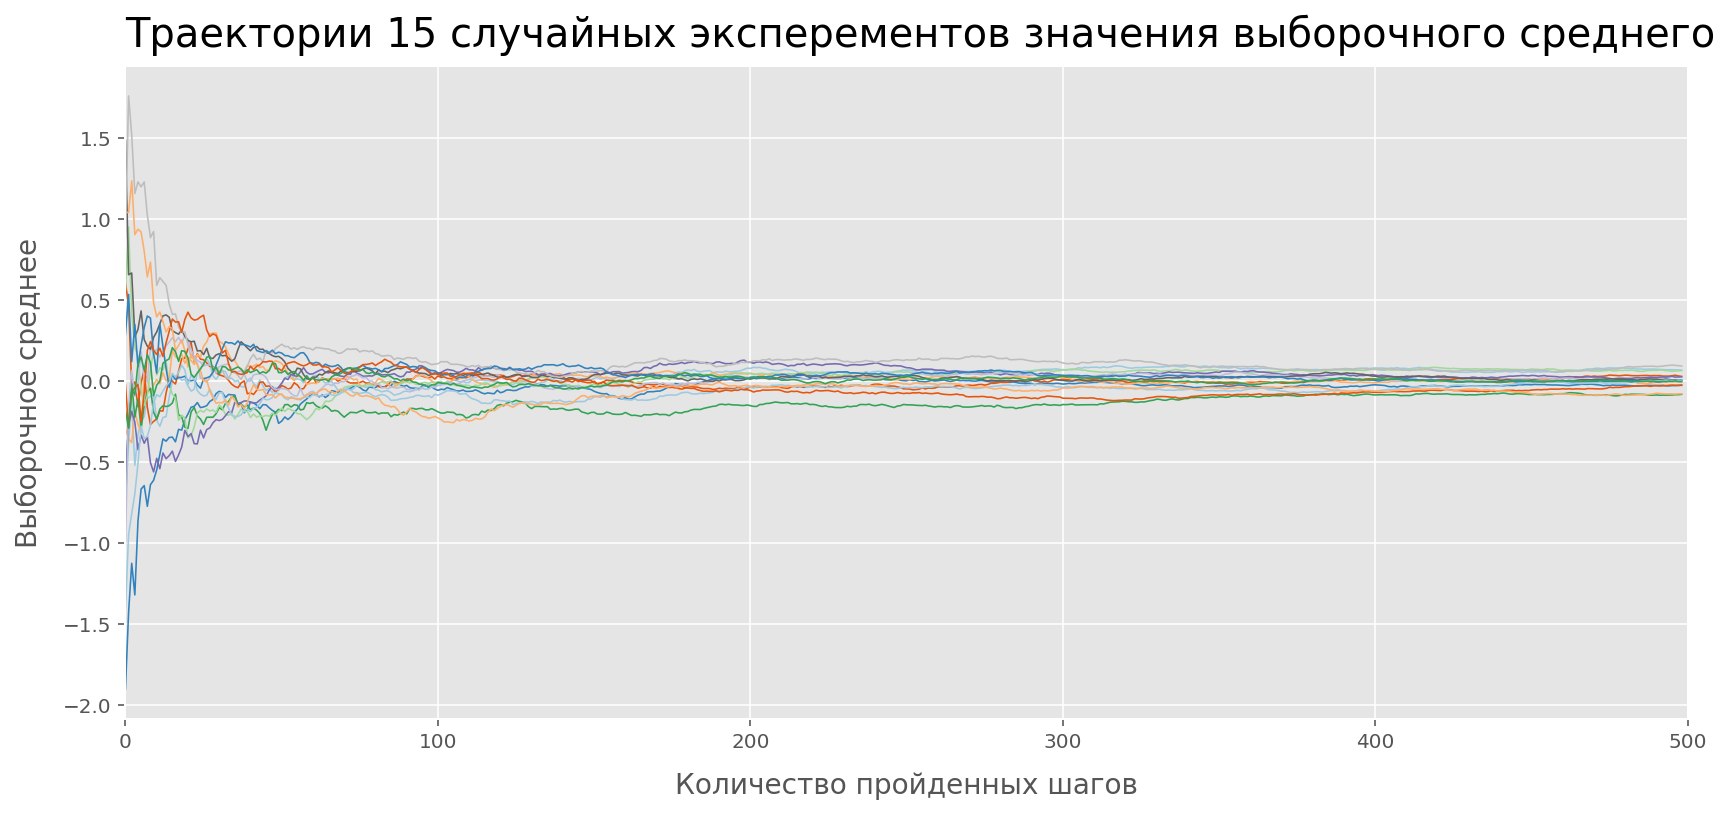

In [70]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
cm = plt.get_cmap('tab20c')
ax.set_prop_cycle('color', [cm(1.*i/10) for i in range(10)])

ax.set_title('Траектории 15 случайных эксперементов значения выборочного среднего', pad=10, fontsize=20, loc='left')
plt.xlabel('Количество пройденных шагов', labelpad=10, fontsize=14)
plt.ylabel('Выборочное среднее', labelpad=10, fontsize=14)
ax.set_xlim(0, 500)

# Рисуем 15 случайных траекторий 
for num in rand_nums:
    ax.plot(mus_hats[num], lw=0.8);

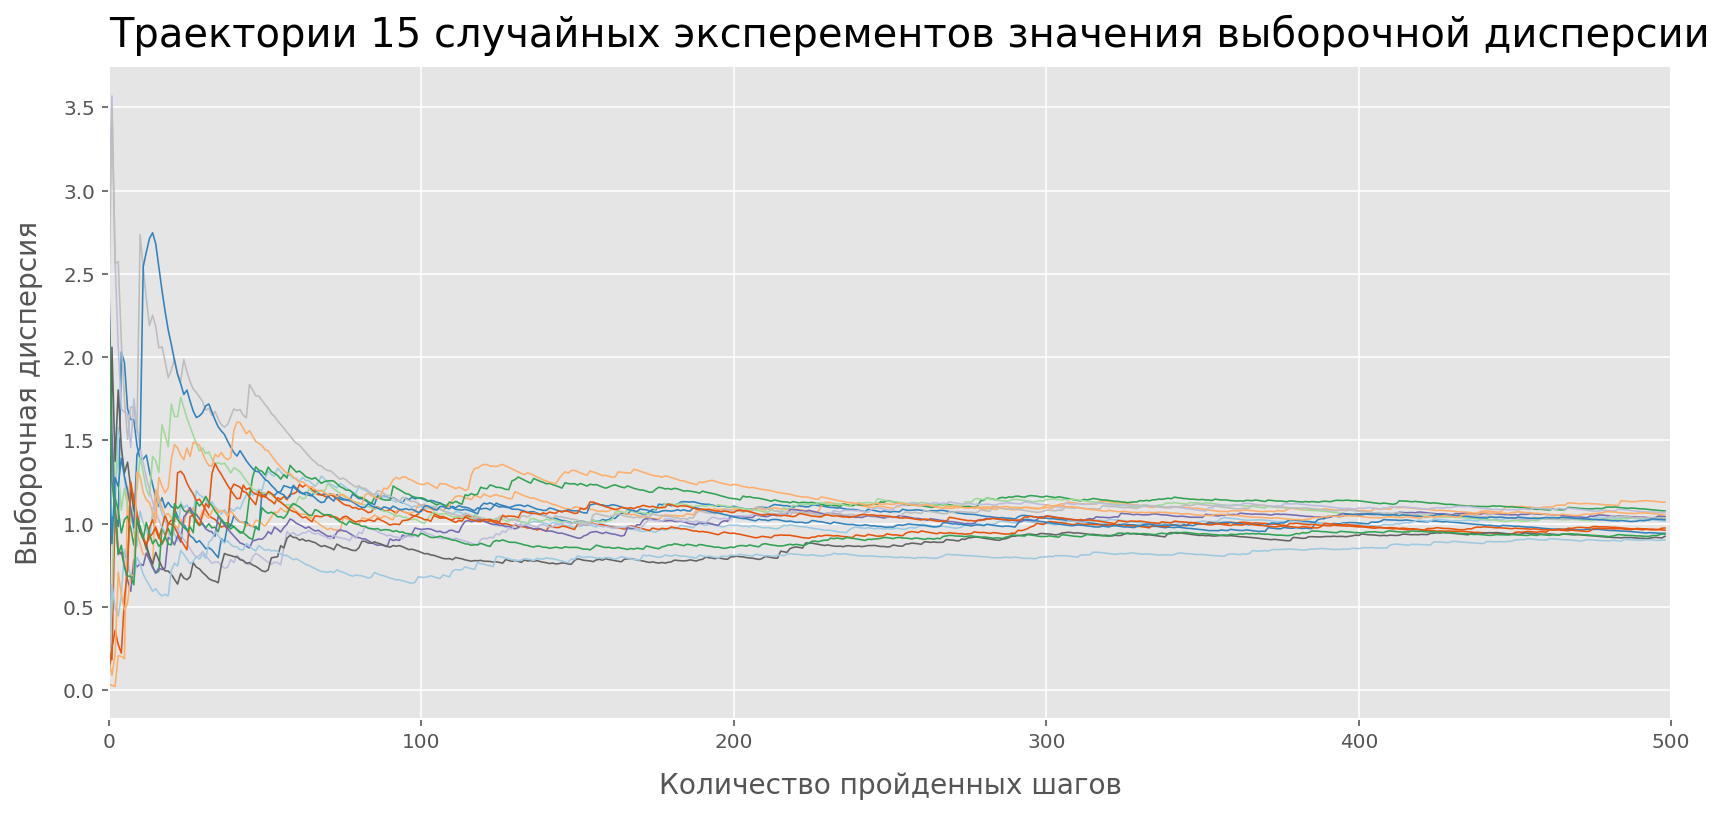

In [71]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
cm = plt.get_cmap('tab20c')
ax.set_prop_cycle('color', [cm(1.*i/10) for i in range(10)])

ax.set_title('Траектории 15 случайных эксперементов значения выборочной дисперсии', pad=10, fontsize=20, loc='left')
plt.xlabel('Количество пройденных шагов', labelpad=10, fontsize=14)
plt.ylabel('Выборочная дисперсия', labelpad=10, fontsize=14)
ax.set_xlim(0, 500)

# Рисуем 15 случайных траекторий 
for num in rand_nums:
    ax.plot(vars_hats[num], lw=0.8);

4.

In [73]:
mean_var = np.array(vars_hats).mean(axis=0)

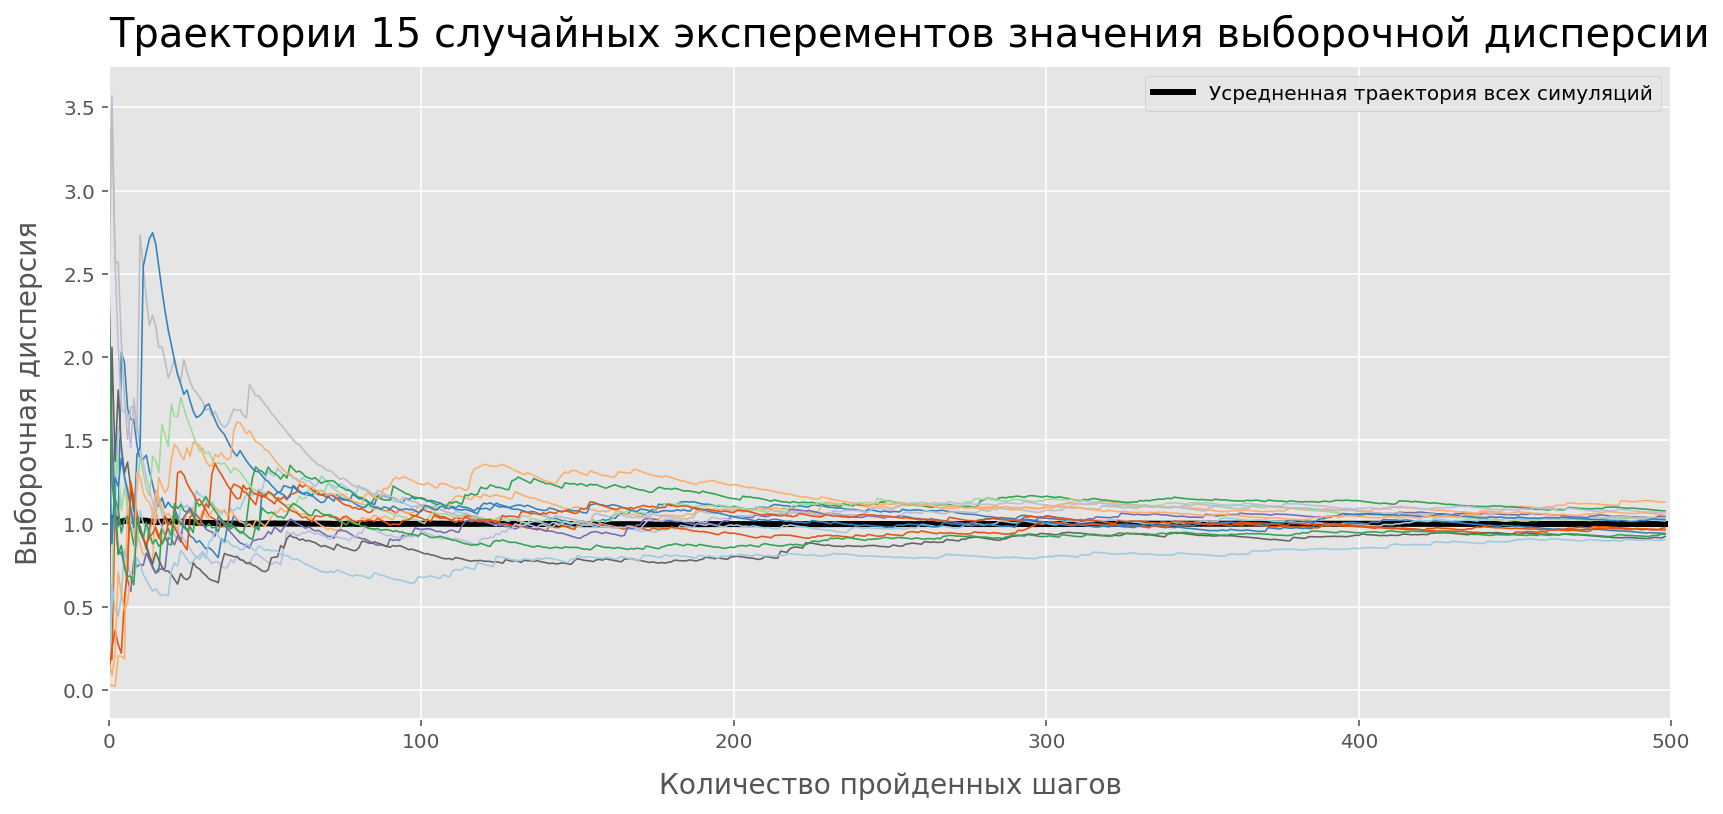

In [80]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
cm = plt.get_cmap('tab20c')
ax.set_prop_cycle('color', [cm(1.*i/10) for i in range(10)])

ax.set_title('Траектории 15 случайных эксперементов значения выборочной дисперсии', pad=10, fontsize=20, loc='left')
plt.xlabel('Количество пройденных шагов', labelpad=10, fontsize=14)
plt.ylabel('Выборочная дисперсия', labelpad=10, fontsize=14)
ax.set_xlim(0, 500)

# Рисуем усреднённую по всем экспериментам тракторию
ax.plot(mean_var, lw=3, color='black', label='Усредненная траектория всех симуляций')


# Рисуем 15 случайных траекторий 
for num in rand_nums:
    ax.plot(vars_hats[num], lw=0.8)
    
plt.legend();

### Парковки от мэра (40 баллов + 15 бонусных баллов)

Перед выборами в центре города открыли неразмеченную парковку длиной $100$ метров. Каждый приезжающий водитель случайным образом выбирает место длиной $2$ метра, и если место оказалось свободным, встает на парковку до конца дня. Если он не помещается в выбранный отрезок, то водитель в нервном состоянии уезжает с парковки. За один день на парковку пытается встать $1000$ проезжающих мимо водителей. Для выполнения всех пунктов заданий проведите $2000$ симуляций. 

*Hint: Для простоты будем считать, что выбор точки на парковке - это центр машины.*

1. В среднем сколько машин оказываются припаркованы к концу дня? [**20 баллов**]

2. Постройте $95$\%-ый доверительный интервал для ожидаемого количества машин припаркованных к концу дня. [**10 баллов**]

3. Постройте $95$\%-ый доверительный интервал для ожидаемого количества свободного места на парковке к концу дня (в метрах). [**10 баллов**]

4. После возникшего хаоса на парковку добавили регулярную разметку для мест длиной $2$ метра, но водители разделились на два лагеря — тех, кто соблюдает и не соблюдает правила разметки. С вероятностью $p$ приезжает честный водитель и занимает случайное свободное место строго по разметке. Водители второго лагеря паркуются, как раньше. Нарисуйте график, где по оси ординат – процент честных водителей, а по оси абсцисс – процент свободного места на парковке к концу дню для вероятностей $p$ равным от $0$ до $1$ с шагом в $5$\%. Для каждого порога вероятности проведите по $500$ симуляций. [**15 бонусных баллов**]

__Считаю иначе: выбор точки на парковке — левая часть места__

In [2]:
cars = 1000
n = 2000

1.

In [38]:
np.random.seed(52)
cnts = []

for _ in tqdm(range(n)):
    parkovka = np.array([1 for _ in range(100)])
    cnt = 0
    
    # начало места
    a = np.random.choice(np.arange(0, 98), size=cars)
    
    # конец места
    b = a + 1
    
    for car in range(cars):
        # занимаем место, если оно свободно
        if (parkovka[np.arange(a[car], b[car] + 1)] == 1).all():
            parkovka[np.arange(a[car], b[car] + 1)] = 0
            cnt += 1
        else:
            continue
            
    cnts.append(cnt)

100%|██████████| 2000/2000 [00:12<00:00, 156.52it/s]


In [20]:
cnts = np.array(cnts)

In [21]:
# выборочное среднее, сколько машин оказываются припаркованы к концу дня
np.mean(cnts)

42.631

2.

(array([ 21.,  92., 288., 524., 545., 371., 129.,  30.]),
 array([39., 40., 41., 42., 43., 44., 45., 46., 47.]),
 <a list of 8 Patch objects>)

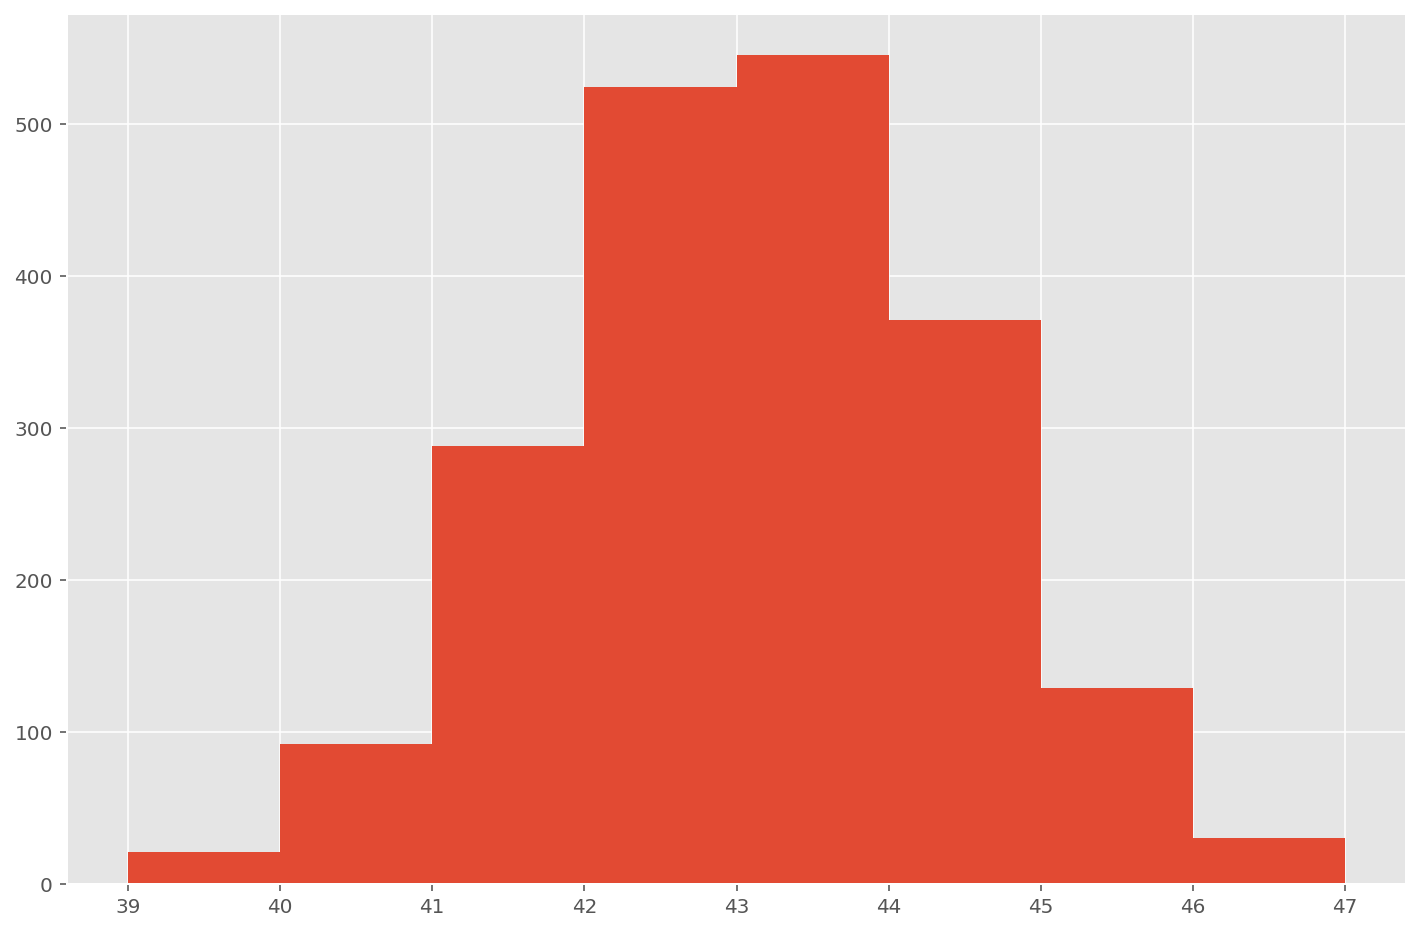

In [22]:
plt.hist(cnts, bins=8)

In [23]:
# Поскольку число наблюдений достаточно велико, можем воспользоваться асимптотикой, так как t(n - 1) стремится к N(0, 1) при n
# к бесконечности

In [24]:
norm_rv = sts.norm()
alpha = 0.05
z_crit = norm_rv.ppf(1 - alpha / 2)

mu_hat = np.mean(cnts)
std_hat = np.std(cnts, ddof=1)

In [25]:
left_bound = mu_hat - z_crit * std_hat / sqrt(len(cnts))
right_bound = mu_hat + z_crit * std_hat / sqrt(len(cnts))

In [26]:
print(f'95% ДИ для \mu: ({left_bound:.3}, {right_bound:.3})')

95% ДИ для \mu: (42.6, 42.7)


3.

In [27]:
np.random.seed(52)
free_place = [] # свободное место в метрах

for _ in tqdm(range(n)):
    parkovka = np.array([1 for _ in range(100)])
    cnt = 0
    
    # начало места
    a = np.random.choice(np.arange(0, 98), size=cars)
    
    # конец места
    b = a + 1
    
    for car in range(cars):
        # занимаем место, если оно свободно
        if (parkovka[np.arange(a[car], b[car] + 1)] == 1).all():
            parkovka[np.arange(a[car], b[car] + 1)] = 0
            cnt += 1
        else:
            continue
            
    free_place.append(np.sum(parkovka))

100%|██████████| 2000/2000 [00:13<00:00, 144.60it/s]


In [28]:
free_place = np.array(free_place)
free_place

array([14, 16, 16, ..., 18, 16, 14])

In [29]:
# Поскольку число наблюдений достаточно велико, можем воспользоваться асимптотикой, так как t(n - 1) стремится к N(0, 1) при n
# к бесконечности

In [30]:
norm_rv = sts.norm()
alpha = 0.05
z_crit = norm_rv.ppf(1 - alpha / 2)

mu_hat = np.mean(free_place)
std_hat = np.std(free_place, ddof=1)

In [31]:
left_bound = mu_hat - z_crit * std_hat / sqrt(len(cnts))
right_bound = mu_hat + z_crit * std_hat / sqrt(len(cnts))

print(f'95% ДИ для \mu: ({left_bound:.3}, {right_bound:.3})')

95% ДИ для \mu: (14.6, 14.9)


4.

In [32]:
proba = np.arange(0, 1.05, 0.05)

In [33]:
proba

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [50]:
def choose_right_or_wrong(p):
    global parkovka
    
    # нечестный водитель
    if np.random.uniform() > p:
        # начало места
        a = np.random.choice(np.arange(0, 98))
        # конец места
        b = a + 1
        
        if (parkovka[np.arange(a, b + 1)] == 1).all():
            parkovka[np.arange(a, b + 1)] = 0

    # честный водитель
    else:
        # начало места
        a = np.random.choice(np.arange(0, 100, 2))
        # конец места
        b = a + 1
        
        if (parkovka[np.arange(a, b + 1)] == 1).all():
            parkovka[np.arange(a, b + 1)] = 0

In [58]:
free_percent = [] # свободное место в метрах

for p in tqdm(proba):
    free_place = []
    
    for _ in range(500):
        parkovka = np.array([1 for _ in range(100)])
        for _ in range(cars):
            choose_right_or_wrong(p)
        
        free_place.append(np.sum(parkovka))
        parkovka = np.array([1 for _ in range(100)])
    
    free_percent.append(np.mean(np.array(free_place)) / 100)

100%|██████████| 21/21 [04:11<00:00, 12.00s/it]


In [71]:
np.array(free_percent), proba

(array([0.1468 , 0.1408 , 0.1398 , 0.13516, 0.12976, 0.12444, 0.125  ,
        0.11948, 0.11284, 0.11056, 0.10012, 0.09444, 0.08384, 0.07804,
        0.06504, 0.05672, 0.04508, 0.0352 , 0.023  , 0.01324, 0.     ]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))

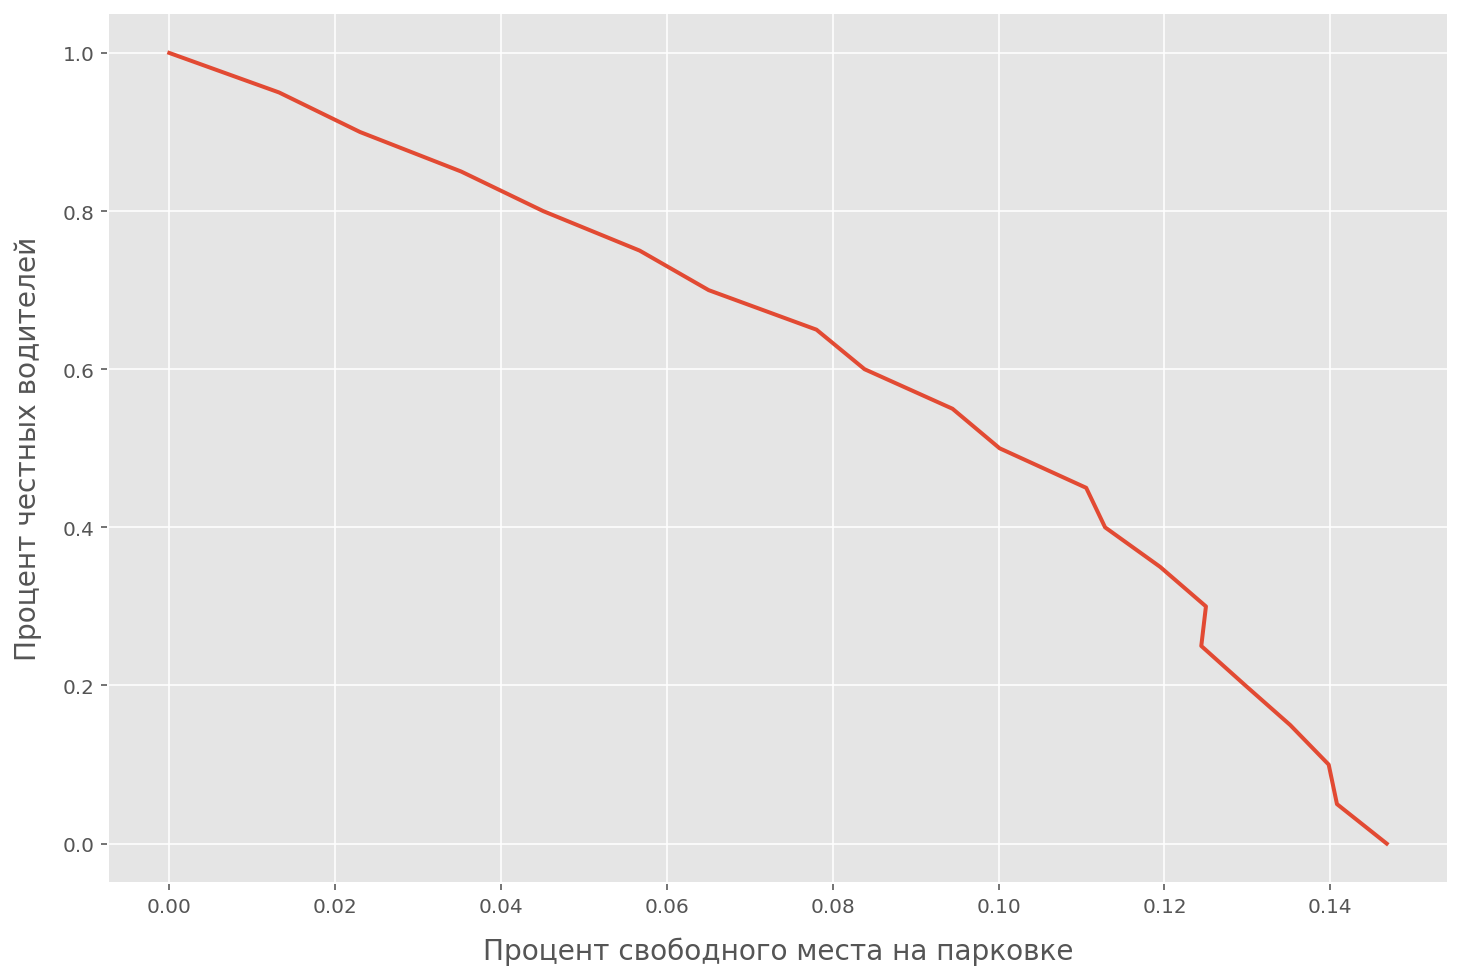

In [76]:
plt.ylabel('Процент честных водителей', labelpad=10, fontsize=14)
plt.xlabel('Процент свободного места на парковке', labelpad=10, fontsize=14)
plt.plot(np.array(free_percent), proba, lw=2);

### Правдоподобие счастья (25 баллов + 15 бонусных баллов)

Загрузите набор данных по измерению уровня счастья в разных странах мира за 2019 год (**data.csv** в репозитории экзамена). Полное описание датасета доступно по ссылке на Kaggle: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

1. Постройте на графике гистограмму для уровня счастья (переменная Score) и ее функции плотности. Является ли распределение нормальным? [**5 баллов**]

2. Пусть уровень счастья – целевая вещественная переменная $y$, все $y_i$ независимы и нормальны $N(\mu, \sigma^2)$, где $\mu = a + b*x_i$. Выведите функцию правдоподобия и задачу для оптимизации поиска коэффициентов $a$, $b$ и $\sigma^2$. [**15 бонусных баллов**]

3. Оцените параметры с помощью метода максимального правдоподобия, если в роли $x_i$ выступает ВВП на душу населения (GDP per capita). [**10 баллов**]

4. Используя оценённые параметры и медианное значение ВВП на душу населения, оцените вероятность того, что уровень счастья будет больше 5.
[**10 баллов**]

In [81]:
df = pd.read_csv('data.csv')

1.

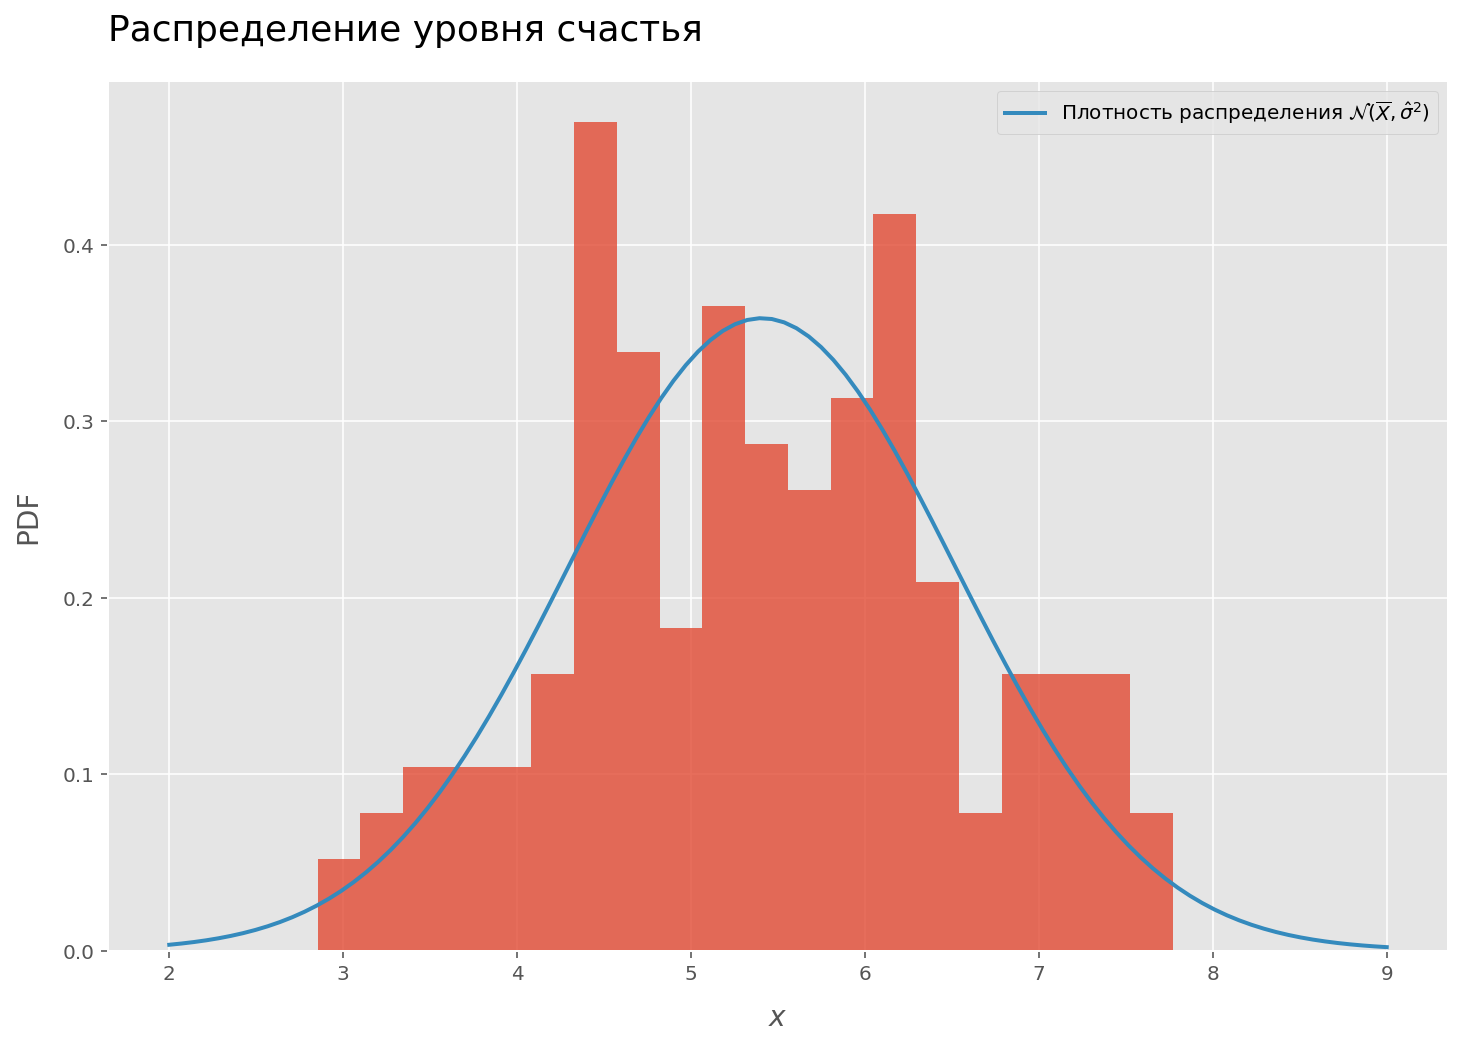

In [90]:
plt.hist(df['Score'], bins=20, density=True, alpha=0.8)
plt.title('Распределение уровня счастья', fontsize=18, pad=20, loc='left')
plt.ylabel('PDF', fontsize=14, labelpad=10)
plt.xlabel('$x$', fontsize=14, labelpad=10)

mu_hat = df['Score'].mean()
std_hat = df['Score'].std(ddof=1)

x_ = np.linspace(2, 9, 100)
y_ = sts.norm(mu_hat, std_hat).pdf(x_)
plt.plot(x_, y_, lw=2, label='Плотность распределения $\mathcal{N}(\overline{X}, \hat{\sigma}^2)$')

plt.legend();

In [92]:
# С помощью критерия Колмогорова-Смирнова проверим, является ли распределение нормальным
sts.kstest(df['Score'], 'norm', args=(mu_hat, std_hat))

KstestResult(statistic=0.05780215493783686, pvalue=0.679019673890023)

In [93]:
# Поскольку p-value очень большое, то гипотеза о нормальности распределения не отвергается на любом разумном уровне значимости

2.

In [120]:
def neq_lklh(thetas, df, x):
    a, b, sigma_squared = thetas
    
    # x здесь агрумент функции
    mu =  a + b * df[x]
    
    # трюк, чтобы дисперсия не была отрицательной
    sigma_squared = np.exp(sigma_squared)
    
    log_lklh = n * np.log(1 / sqrt(2 * np.pi * sigma_squared)) - (1/(2 * sigma_squared)) * np.sum((df['Score'] - mu) ** 2)

    return - log_lklh

3.

In [121]:
thetas_init = [0, 0, 0]
optim_res = minimize(neq_lklh, thetas_init, args=(df, 'GDP per capita'))

In [125]:
print(f'a = {optim_res.x[0]:.3} \nb = {optim_res.x[1]:.3} \nsigma_squared = {np.exp(optim_res.x[2]):.3}')

a = 3.4 
b = 2.22 
sigma_squared = 0.142


4.

In [126]:
a = optim_res.x[0]
b = optim_res.x[1]
sigma_squared = np.exp(optim_res.x[2])

In [129]:
mu = a + b * df['GDP per capita'].median()

In [133]:
norm_rv = sts.norm(mu, sqrt(sigma_squared))
prob = 1 - norm_rv.cdf(5) # P(Y > 5) = 1 - P(Y <= 5)
print(f'Prob(Y > {5}) = {prob}')

Prob(Y > 5) = 0.9197060339151337
